In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
n_values = 32
x = tf.linspace(-3.0, 3.0, n_values)

In [20]:
sess = tf.Session()
result = sess.run(x)
sess.close()
print(result)

[-3.         -2.80645156 -2.61290312 -2.41935492 -2.22580647 -2.03225803
 -1.83870971 -1.64516139 -1.45161295 -1.25806451 -1.06451619 -0.87096786
 -0.67741942 -0.48387098 -0.29032278 -0.09677434  0.0967741   0.29032254
  0.48387098  0.67741919  0.87096763  1.06451607  1.25806427  1.45161295
  1.64516115  1.83870935  2.03225803  2.22580624  2.41935444  2.61290312
  2.80645132  3.        ]


In [22]:
sess = tf.InteractiveSession()
sigma = 1.0
mean = 0.0
# Gaussian Distribution: e^( -(X - mean)^2 / (2 * sigma^2) ) * 1 / sigma * (2 * PI)^2
z = ( tf.exp( tf.negative( tf.pow(x - mean, 2.0) / (2.0 * tf.pow(sigma, 2.0)) ) ) * (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

[ 0.00443191  0.0077737   0.01313394  0.02137437  0.03350599  0.05059209
  0.07358232  0.10308496  0.13910672  0.18081389  0.22638434  0.27301833
  0.31715256  0.35487509  0.38248441  0.39708439  0.39708439  0.38248444
  0.35487509  0.31715262  0.27301839  0.22638437  0.18081395  0.13910672
  0.103085    0.07358237  0.05059209  0.03350601  0.02137439  0.01313394
  0.0077737   0.00443191]


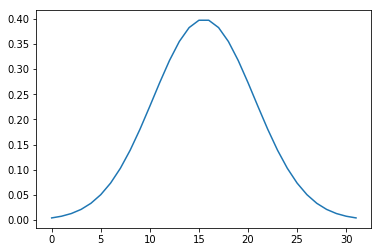

In [23]:
# %% Execute the graph and plot the result
plt.plot(z.eval())
print(z.eval())

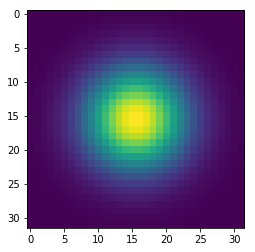

In [24]:
z_2d = tf.matmul(tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))
plt.imshow(z_2d.eval())

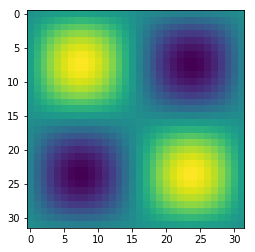

In [66]:
x = tf.sin(tf.linspace(-3.0, 3.0, n_values))
y = tf.matmul(tf.reshape(x, [n_values, 1]), tf.reshape(x, [1, n_values]))
plt.imshow(y.eval())

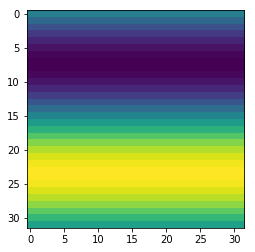

In [67]:
x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values, 1])
y = tf.reshape(tf.ones_like(x), [1, n_values])
z = tf.matmul(x, y)
plt.imshow(z.eval())

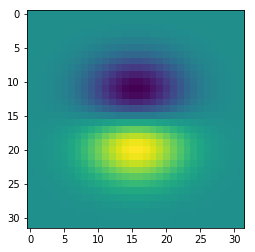

In [8]:
x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values, 1])
y = tf.reshape(tf.ones_like(x), [1, n_values])
z = tf.multiply(tf.matmul(x, y), z_2d)
plt.imshow(z.eval())

In [9]:
# %% We can also list all the operations of a graph:
ops = tf.get_default_graph().get_operations()
print([op.name for op in ops])

['LinSpace/start', 'LinSpace/stop', 'LinSpace/num', 'LinSpace', 'sub/y', 'sub', 'Pow/y', 'Pow', 'Pow_1/x', 'Pow_1/y', 'Pow_1', 'mul/x', 'mul', 'truediv', 'Neg', 'Exp', 'Sqrt/x', 'Sqrt', 'mul_1/x', 'mul_1', 'truediv_1/x', 'truediv_1', 'mul_2', 'Reshape/shape', 'Reshape', 'Reshape_1/shape', 'Reshape_1', 'MatMul', 'LinSpace_1/start', 'LinSpace_1/stop', 'LinSpace_1/num', 'LinSpace_1', 'Sin', 'Reshape_2/shape', 'Reshape_2', 'ones_like/Shape', 'ones_like/Const', 'ones_like', 'Reshape_3/shape', 'Reshape_3', 'MatMul_1', 'Mul']


In [71]:

# %% Lets try creating a generic function for computing the same thing:
def gabor(n_values=32, sigma=1.0, mean=0.0):
    x = tf.linspace(-3.0, 3.0, n_values)
    z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) / (2.0 * tf.pow(sigma, 2.0)))) 
         * (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
    gauss_kernel = tf.matmul(tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))
    
    x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values, 1])
    y = tf.reshape(tf.ones_like(x), [1, n_values])
    gabor_kernel = tf.multiply(tf.matmul(x, y), gauss_kernel)
    return gauss_kernel, gabor_kernel

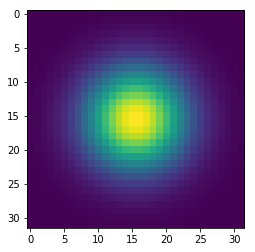

In [74]:
# %% Confirm this does something:
plt.imshow(gabor()[0].eval())

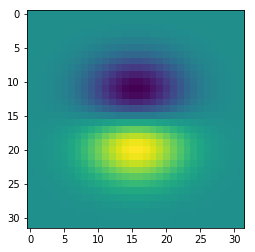

In [75]:
plt.imshow(gabor()[1].eval())

In [76]:

# %% And another function which can convolve
def convolve(img, W):
    # The W matrix is only 2D
    # But conv2d will need a tensor which is 4d:
    # height x width x n_input x n_output
    if len(W.get_shape()) == 2:
        dims = W.get_shape().as_list() + [1, 1]
        print(dims)
        W = tf.reshape(W, dims)

    if len(img.get_shape()) == 2:
        # num x height x width x channels
        dims = [1] + img.get_shape().as_list() + [1]
        img = tf.reshape(img, dims)
    elif len(img.get_shape()) == 3:
        dims = [1] + img.get_shape().as_list()
        img = tf.reshape(img, dims)
        # if the image is 3 channels, then our convolution
        # kernel needs to be repeated for each input channel
        print(img.shape)
        print('weight1: ', W.shape)
        W = tf.concat([W, W, W], 2)
        print('weight2: ', W.shape)

    # Stride is how many values to skip for the dimensions of
    # num, height, width, channels
    convolved = tf.nn.conv2d(img, W,
                             strides=[1, 1, 1, 1], padding='SAME')
    return convolved

(512, 512, 3)


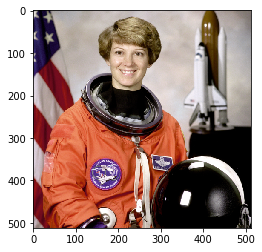

In [77]:
# %% Load up an image:
from skimage import data
img = data.astronaut()
plt.imshow(img)
print(img.shape)

In [79]:
# %% Now create a placeholder for our graph which can store any input:
x = tf.placeholder(tf.float32, shape=img.shape)
weight = gabor()[1]
print(weight.shape)

(32, 32)


In [81]:
# %% And a graph which can convolve our image with a gabor
out = convolve(x, weight)

[32, 32, 1, 1]
(1, 512, 512, 3)
weight1:  (32, 32, 1, 1)
weight2:  (32, 32, 3, 1)


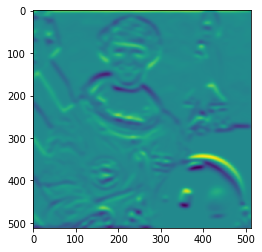

In [82]:
# %% Now send the image into the graph and compute the result
result = tf.squeeze(out).eval(feed_dict={x: img})
plt.imshow(result)

In [87]:

# %% And another function which can convolve
def convolve(img, W):
    # The W matrix is only 2D
    # But conv2d will need a tensor which is 4d:
    # height x width x n_input x n_output
    if len(W.get_shape()) == 2:
        dims = W.get_shape().as_list() + [1, 1]
        print(dims)
        W = tf.reshape(W, dims)

    if len(img.get_shape()) == 2:
        # num x height x width x channels
        dims = [1] + img.get_shape().as_list() + [1]
        img = tf.reshape(img, dims)
    elif len(img.get_shape()) == 3:
        dims = [1] + img.get_shape().as_list()
        img = tf.reshape(img, dims)
        # if the image is 3 channels, then our convolution
        # kernel needs to be repeated for each input channel
        print(img.shape)
        print('weight1: ', W.shape)
        W = tf.concat([W, W, W], 2)
        print('weight2: ', W.shape)
        W = tf.concat([W, W, W], 3)
        print('weight3: ', W.shape)

    # Stride is how many values to skip for the dimensions of
    # num, height, width, channels
    convolved = tf.nn.conv2d(img, W,
                             strides=[1, 1, 1, 1], padding='SAME')
    return convolved

(32, 32)
[32, 32, 1, 1]
(1, 512, 512, 3)
weight1:  (32, 32, 1, 1)
weight2:  (32, 32, 3, 1)
weight3:  (32, 32, 3, 3)


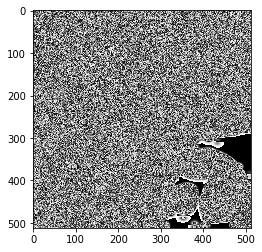

In [88]:
# %% Now create a placeholder for our graph which can store any input:
x = tf.placeholder(tf.float32, shape=img.shape)
weight = gabor()[1]
print(weight.shape)

# %% And a graph which can convolve our image with a gabor
out = convolve(x, weight)

# %% Now send the image into the graph and compute the result
result = tf.squeeze(out).eval(feed_dict={x: img})
plt.imshow(result)

In [15]:
sess = tf.Session()
a = tf.ones([6])
print(sess.run(a))
indices=[1,3,5]
print(sess.run(tf.scatter_nd([[1],[3],[5]], [1,2,1], [6])))

[ 1.  1.  1.  1.  1.  1.]
[0 1 0 2 0 1]
